# Prerequisite Test – ES335: Machine Learning
### Name - S.M Hemant, Roll - 25210122
1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


#### Answer
First matrix - n rows k columns

Second matrix - k rows m columns

Result dimension will be n,m 

where each element will be a (k-1) sums of k product of two numbers.
Therefore total operations required will be n.m.(k-1) additions and n.m.k 
multiplications will be needed.


2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [ ]:
## let n,k,m be 100,80,50
import numpy as np
import sys
import time

n=100
k=80
m=50

Matrix1 = np.random.rand(n, k)
Matrix2 = np.random.rand(k, m)

temp= time.time()
## using list comprehension
Matrix3 = np.array([[sum(Matrix1[i, j] * Matrix2[j, l] for j in range(k)) for l in range(m)] for i in range(n)])
print("Time taken using list comprehension: ", time.time() - temp)

temp = time.time()
## using numpy dot product
Matrix4 = np.dot(Matrix1, Matrix2)
print("Time taken using numpy dot product: ", time.time() - temp)
## print both matrices in beautiful format with 4 decimal places
np.set_printoptions(precision=4, suppress=True)
print("Matrix 3 (list comprehension):\n", Matrix3)
print("Matrix 4 (numpy dot product):\n", Matrix4)



Time taken using list comprehension:  0.4855504035949707
Time taken using numpy dot product:  0.0006854534149169922
Matrix 3 (list comprehension):
 [[20.1423 17.1207 19.885  ... 19.1797 18.8985 19.3526]
 [21.2393 20.1717 19.9156 ... 19.8429 20.88   18.5985]
 [20.7534 20.2668 21.5652 ... 19.3346 22.6399 19.1942]
 ...
 [19.6283 17.1877 19.0031 ... 18.3655 21.4131 18.4056]
 [21.7844 20.6986 21.8168 ... 20.299  22.1    21.6114]
 [19.9949 20.4473 20.6052 ... 20.0699 21.8658 19.2449]]
Matrix 4 (numpy dot product):
 [[20.1423 17.1207 19.885  ... 19.1797 18.8985 19.3526]
 [21.2393 20.1717 19.9156 ... 19.8429 20.88   18.5985]
 [20.7534 20.2668 21.5652 ... 19.3346 22.6399 19.1942]
 ...
 [19.6283 17.1877 19.0031 ... 18.3655 21.4131 18.4056]
 [21.7844 20.6986 21.8168 ... 20.299  22.1    21.6114]
 [19.9949 20.4473 20.6052 ... 20.0699 21.8658 19.2449]]



3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?


* Finding median using the above method would take $O(n^2)$ 
* We could use "median of medians with quickselect method" to find median of array in $O(n)$

In [109]:
## array
import time
arr = np.random.randint(1,1000,size=10000)
def median_pass_method(arr):
    if len(arr) == 0:
        return None
    arr = arr.copy().tolist()
    if len(arr) % 2 == 0:
        n = len(arr) // 2 -1
        for i in range(n):
            arr.remove(max(arr))
        median = max(arr)
        arr.remove(median)
        median = (median + max(arr)) / 2
    else:
        n = len(arr) // 2 
        for i in range(n):
            arr.remove(max(arr))
        median = max(arr)
    return median /1.0
    
    

def median_of_medians(arr):
    if len(arr) < 10:
        return sorted(arr)[len(arr) // 2]
    
    medians = []
    for i in range(0, len(arr), 5):
        group = arr[i:i + 5]
        medians.append(sorted(group)[len(group) // 2])
    
    return median_of_medians(medians)

def find_kth_element(arr,k):
    if len(arr) == 1:
        return arr[0]
    
    pivot = median_of_medians(arr)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]
    
    if k < len(lows):
        return find_kth_element(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return find_kth_element(highs, k - len(lows) - len(pivots))

def median_of_medians_method(arr):
    if len(arr) == 0:
        return None
    if len(arr) % 2 == 0:
        mid1 = find_kth_element(arr, len(arr) // 2 - 1)
        mid2 = find_kth_element(arr, len(arr) // 2)
        return (mid1 + mid2) / 2
    else:
        return find_kth_element(arr, len(arr) // 2)/1.0


temp = time.time()
median = median_pass_method(arr)
print(f"Time taken using pass method: {time.time() - temp}" )
print("Median using pass method: ", median)

temp = time.time()
median = median_of_medians_method(arr)
print("Time taken using median of medians: ", time.time() - temp)
print("Median using median of medians: ", median)

temp = time.time()
median = np.median(arr)
print("Time taken using numpy median: ", time.time() - temp)   
print("Median using numpy median: ", median)

Time taken using pass method: 1.8301243782043457
Median using pass method:  502.0
Time taken using median of medians:  0.04737067222595215
Median using median of medians:  502.0
Time taken using numpy median:  0.0005431175231933594
Median using numpy median:  502.0



4. What is the gradient of the following function with respect to x and y?
   
   $f(x, y) = x^2 y + y^3 \sin(x)$


Gradient w.r.t x:  $   2xy + y^3cos(x)   $

Gradient w.r.t y:  $   x^2 + 3y^2sin(x)   $


5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [ ]:
## using jax to find gradient of a two variable function
import jax.numpy as jnp
from jax import grad
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
grad_x = grad(f, argnums=0)
grad_y = grad(f, argnums=1)
print("Gradient w.r.t x: ", grad_x(2.0, 3.0))  ## from formula it should be 2*2*3 + 3**3 * np.cos(2.0) = 12+27(-0.4161468365471424) 
print("Gradient w.r.t y: ", grad_y(2.0, 3.0))  ## from formula it should be 2**2 + 3*3*3*np.sin(2.0) = 4+27(0.9092974268256817)

Gradient w.r.t x:  0.7640352
Gradient w.r.t y:  28.55103



6. Use `sympy` to confirm that you obtain the same gradient analytically.


In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

## function
f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print("Gradient w.r.t x: ", df_dx.evalf(subs={x:2,y:3}))
print("Gradient w.r.t y: ",df_dy.evalf(subs={x: 2, y: 3}))

Gradient w.r.t x:  0.764035413227156
Gradient w.r.t y:  28.5510305242934



7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
   - 2022
     - Branch 1
       - Roll Number: 1, Name: N, Marks:
         - Maths: 100, English: 70 ...
     - Branch 2
   - 2023
     - Branch 1
     - Branch 2
   - 2024
     - Branch 1
     - Branch 2
   - 2025
     - Branch 1
     - Branch 2


In [161]:
record = {
    2022:{
        "Branch 1":{
            1:{
                "Roll Number": "1",
                "Name": "N",
                "Marks": {
                    "Maths": 90,
                    "English": 85,
                    "Chemistry": 88
                }
            }
        }
    },
    2023:{
        "Branch 2":{
            1:{
                "Roll Number": "2",
                "Name": "M",
                "Marks": {
                    "Maths": 92,
                    "Physics": 89,
                    "Chemistry": 91
                }
            }
        }
    }
}
record 

{2022: {'Branch 1': {1: {'Roll Number': '1',
    'Name': 'N',
    'Marks': {'Maths': 90, 'English': 85, 'Chemistry': 88}}}},
 2023: {'Branch 2': {1: {'Roll Number': '2',
    'Name': 'M',
    'Marks': {'Maths': 92, 'Physics': 89, 'Chemistry': 91}}}}}


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.


In [ ]:
class Database:
    def __init__(self):
        self.years =[]
    
    def add_record(self, year):
        if year not in self.years:
            self.years.append(year)
        else:
            print(f"Year {year} already exists in the database.")
    
    def __str__(self):
        return f"Database with years: {[i.__str__() for i in self.years]}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    
    def add_branch(self, branch):
        if branch not in self.branches:
            self.branches.append(branch)
        else:
            print(f"Branch {branch} already exists in year {self.year}.")
    
    def __str__(self):
        return f"Year: {self.year} with branches: {[branch.name for branch in self.branches]} and students: {[student.name for branch in self.branches for student in branch.students]}"
    
class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    
    def add_student(self, student):
        if student not in self.students:
            self.students.append(student)
        else:
            print(f"Student {student['Name']} already exists in branch {self.name}.")
    
    def __str__(self):
        return f"Branch: {self.name}"

class Student:
    def __init__(self, roll_number, name, subjects):
        self.roll_number = roll_number
        self.name = name
        self.subject_marks = subjects
    
    def __str__(self):
        return f"Student: {self.name}, Roll Number: {self.roll_number}, Marks: {self.marks}"
    
class Subject:
    def __init__(self, name, marks):
        self.name = name
        self.marks = marks
    
    def __str__(self):
        return f"Subject: {self.name}, Marks: {self.marks}"

db = Database()

year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)
db.add_record(year_2022)
db.add_record(year_2023)
db.add_record(year_2024)
db.add_record(year_2025)

branch_1 = Branch("AI")
branch_2 = Branch("CSE")
branch_3 = Branch("ECE")

student_1 = Student("1", "N", {"ML": 90, "DL": 85, "DBMS": 88})
student_2 = Student("2", "M", {"CS": 92, "Algo": 89, "Theory": 91})
student_3 = Student("3", "A", {"Vlsi": 95, "5G": 90, "CV": 93})

branch_1.add_student(student_1)
branch_2.add_student(student_2)
branch_3.add_student(student_3)

year_2022.add_branch(branch_1)
year_2022.add_branch(branch_2)
year_2023.add_branch(branch_3)
year_2024.add_branch(branch_1)
year_2025.add_branch(branch_2)

print(db)


Database with years: ["Year: 2022 with branches: ['AI', 'CSE'] and students: ['N', 'M']", "Year: 2023 with branches: ['ECE'] and students: ['A']", "Year: 2024 with branches: ['AI'] and students: ['N']", "Year: 2025 with branches: ['CSE'] and students: ['M']"]



9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
   - $y = x$
   - $y = x^2$
   - $y = \frac{x^3}{100}$
   - $y = \sin(x)$
   - $y = \frac{\sin(x)}{x}$
   - $y = \log(x)$
   - $y = e^x$


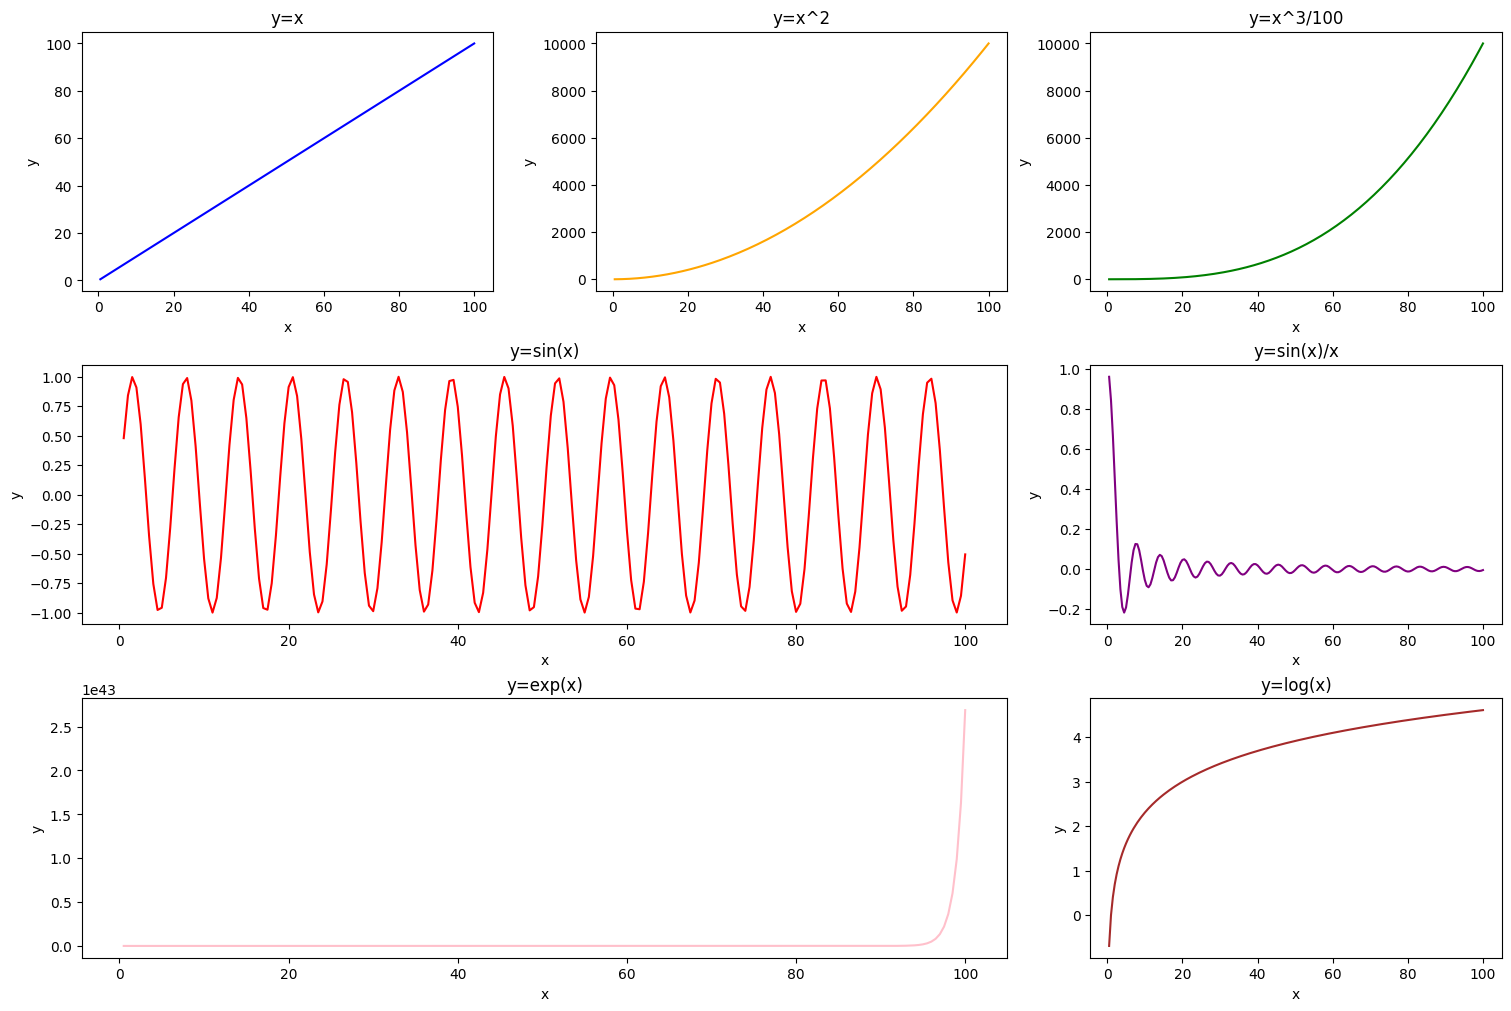

In [98]:
import matplotlib.pyplot as plt
import numpy as np

x= np.linspace(0.5, 100, 200)
fig, ax = plt.subplots(3,3, figsize=(15, 10), constrained_layout=True)

## y=x
plt.subplot(3, 3, 1)
plt.plot(x, x, label='y=x', color='blue')
plt.title('y=x')
plt.xlabel('x')
plt.ylabel('y')

## y=x^2
plt.subplot(3, 3, 2)
plt.plot(x, x**2, label='y=x^2', color='orange')
plt.title('y=x^2')
plt.xlabel('x')
plt.ylabel('y')

## y=x^3/100
plt.subplot(3, 3, 3)
plt.plot(x, x**3/100, label='y=x^3', color='green')
plt.title('y=x^3/100')
plt.xlabel('x')
plt.ylabel('y')

## y=sin(x)
plt.subplot(3, 3, (4, 5))
plt.plot(x, np.sin(x), label='y=sin(x)', color='red')
plt.title('y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')

## y=sin(x)/x
plt.subplot(3, 3, 6)
plt.plot(x, np.sin(x)/x, label='y=sin(x)/x', color='purple')
plt.title('y=sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')

## y=log(x)
plt.subplot(3, 3, 9)
plt.plot(x, np.log(x), label='y=log(x)', color='brown')
plt.title('y=log(x)')
plt.xlabel('x')
plt.ylabel('y')

## y=exp(x)
plt.subplot(3, 3,(7, 8))
plt.plot(x, np.exp(x), label='y=exp(x)', color='pink')
plt.title('y=exp(x)')
plt.xlabel('x')
plt.ylabel('y')
ax[1,0].axis('off') 
ax[2,0].axis('off')
ax[1,1].axis('off') 
ax[2,1].axis('off')

plt.show()


10. Using numpy generate a matrix of size `20X5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as "a", "b", "c", "d", "e". Find the column with the highest standard deviation. Find the row with the lowest mean.


In [119]:
## random matrix 20x5
matrix = np.random.rand(20, 5) + 1
print("Random Matrix (20x5):\n", matrix)

import pandas as pd
df = pd.DataFrame(matrix, columns=list("abcde"))
desc = df.describe()
print("\nColumn with highest std deviation:", desc.loc['std'].idxmax())
print("\nColumn with lowest mean:", desc.loc['mean'].idxmin())
df

Random Matrix (20x5):
 [[1.10207173 1.75693533 1.33965102 1.63796854 1.6037829 ]
 [1.38582797 1.53156772 1.64513853 1.94095033 1.57563407]
 [1.61436751 1.06785582 1.95221581 1.52808193 1.80127342]
 [1.05029106 1.42091014 1.25697546 1.2669759  1.79145373]
 [1.62386673 1.43974531 1.01058574 1.96492794 1.96202325]
 [1.21755221 1.04134637 1.53019936 1.95141081 1.91039585]
 [1.58466286 1.30354885 1.32996088 1.89791355 1.49178404]
 [1.13111623 1.24842548 1.2767949  1.12354668 1.46304438]
 [1.91605091 1.66878254 1.07247392 1.00549482 1.27624767]
 [1.36269293 1.77674967 1.96700552 1.38756717 1.68669003]
 [1.99490191 1.74566658 1.63618955 1.07807485 1.3232152 ]
 [1.91339216 1.20100548 1.84359036 1.69632369 1.36632437]
 [1.52917427 1.54280647 1.71405379 1.51655594 1.13307599]
 [1.77345467 1.4062725  1.96309389 1.28351378 1.26307878]
 [1.3335074  1.57231702 1.89486974 1.17628164 1.2796788 ]
 [1.58167984 1.45433424 1.44732289 1.82073426 1.9238783 ]
 [1.48130697 1.6873518  1.80105871 1.51836641 1.2

,a,b,c,d,e
0,1.102072,1.756935,1.339651,1.637969,1.603783
1,1.385828,1.531568,1.645139,1.940950,1.575634
2,1.614368,1.067856,1.952216,1.528082,1.801273
3,1.050291,1.420910,1.256975,1.266976,1.791454
4,1.623867,1.439745,1.010586,1.964928,1.962023
5,1.217552,1.041346,1.530199,1.951411,1.910396
6,1.584663,1.303549,1.329961,1.897914,1.491784
7,1.131116,1.248425,1.276795,1.123547,1.463044
8,1.916051,1.668783,1.072474,1.005495,1.276248
9,1.362693,1.776750,1.967006,1.387567,1.686690



11. Add a new column to the dataframe called "f" which is the sum of the columns "a", "b", "c", "d", "e". Create another column called "g". The value in the column "g" should be "LT8" if the value in the column "f" is less than 8 and "GT8" otherwise. Find the number of rows in the dataframe where the value in the column "g" is "LT8". Find the standard deviation of the column "f" for the rows where the value in the column "g" is "LT8" and "GT8" respectively.


In [137]:
df["f"]= df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")
print("Number of rows with g=LT8:", df[df["g"] == "LT8"].shape[0])
print("Std devation of column 'f':", df["f"].groupby(df["g"]).std())
df

Number of rows with g=LT8: 13
Std devation of column 'f': g
GT8    0.081190
LT8    0.484145
Name: f, dtype: float64


,a,b,c,d,e,f,g
0,1.102072,1.756935,1.339651,1.637969,1.603783,7.440410,LT8
1,1.385828,1.531568,1.645139,1.940950,1.575634,8.079119,GT8
2,1.614368,1.067856,1.952216,1.528082,1.801273,7.963794,LT8
3,1.050291,1.420910,1.256975,1.266976,1.791454,6.786606,LT8
4,1.623867,1.439745,1.010586,1.964928,1.962023,8.001149,GT8
5,1.217552,1.041346,1.530199,1.951411,1.910396,7.650905,LT8
6,1.584663,1.303549,1.329961,1.897914,1.491784,7.607870,LT8
7,1.131116,1.248425,1.276795,1.123547,1.463044,6.242928,LT8
8,1.916051,1.668783,1.072474,1.005495,1.276248,6.939050,LT8
9,1.362693,1.776750,1.967006,1.387567,1.686690,8.180705,GT8



12. Write a small piece of code to explain broadcasting in numpy.

In [160]:
## to show broadcasting in numpy 
import numpy as np
m=2
n=3
arr1 = np.random.randint(1, 100, size=(m, n))
print("Array 1 shape:", arr1.shape)
arr2 = np.random.randint(1, 100, size=(1, n))
print("Array 2 shape:", arr2.shape)
result = arr1 + arr2

## the corresponding dimension should be 1 or equal to allow operations to work by replicating values in the smaller array
print("Result of broadcasting addition:\n", result)
print("Result of broadcasting multiplication:\n", arr1*arr2)

Array 1 shape: (2, 3)
Array 2 shape: (1, 3)
Result of broadcasting addition:
 [[123 139  89]
 [176 134  99]]
Result of broadcasting multiplication:
 [[3182 4674 1600]
 [7740 4389 2240]]


13. Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [156]:
def argmin(arr):
    if len(arr) == 0:
        return -1
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i
    return min_index

arr = np.array([3, 7, 4, 1, 5, 9, 2, 6, 5])
min_index = argmin(arr)
print(f"The index of the minimum element in the array {arr} is: {min_index}")
print(f"Verifying with numpy: {np.argmin(arr)}")

The index of the minimum element in the array [3 7 4 1 5 9 2 6 5] is: 3
Verifying with numpy: 3
